## Abstract

### Olist Marketing Funnel: Customer Segmentation, RFM Modeling, Persuasion Modeling, Targeted Recommendations with controlled A/B Testing, Social Media Analytics

A Data Driven Algorithmic Marketing system for brazil’s biggest online marketplace, to segment customers, to do Cohort Analysis, RFM Modeling, Uplift Modeling, Identify Upselling and Cross Selling opportunities using Targeted Recommendations, Context Aware Recommendation using product Features, Pricing Optimization.

### Brazilian E-commerce Dataset by Olist

Đây là tập dữ liệu công khai về thương mại điện tử của Brazil về các đơn đặt hàng được thực hiện tại Olist. Tập dữ liệu có thông tin của 100 nghìn đơn hàng từ năm 2016 đến 2018 được thực hiện tại Brazil. Các tính năng của nó cho phép xem đơn đặt hàng từ nhiều khía cạnh: từ trạng thái đơn hàng, giá cả, thanh toán và hiệu suất vận chuyển đến vị trí của khách hàng, thuộc tính sản phẩm và cuối cùng là đánh giá do khách hàng viết. Nó cũng có một tập dữ liệu định vị địa lý liên quan đến mã zip của Brazil với tọa độ vĩ độ/lng.

Đây là dữ liệu thương mại thực sự, đã được ẩn danh và các tham chiếu đến các công ty và đối tác trong văn bản đánh giá đã được thay thế bằng tên của trong Game of Thrones great houses.

In [3]:
# importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
np.random.seed(42)
%matplotlib inline


### Load the dataset

In [2]:
import gdown

folder_id = '1ZLXr9trxFz1Nuscgh-JZBnsjPuXA8syB'

gdown.download_folder(id=folder_id, quiet=True)

['/content/olist_dataset/olist_customers_dataset.csv',
 '/content/olist_dataset/olist_geolocation_dataset.csv',
 '/content/olist_dataset/Olist_Master.csv',
 '/content/olist_dataset/olist_order_items_dataset.csv',
 '/content/olist_dataset/olist_order_payments_dataset.csv',
 '/content/olist_dataset/olist_order_reviews_dataset.csv',
 '/content/olist_dataset/olist_orders_dataset.csv',
 '/content/olist_dataset/olist_products_dataset.csv',
 '/content/olist_dataset/Olist_Recommendation_Dataset.csv',
 '/content/olist_dataset/olist_sellers_dataset.csv',
 '/content/olist_dataset/product_category_name_translation.csv']

In [4]:
path = "olist_dataset/"

In [5]:
customers_db = pd.read_csv(path + "olist_customers_dataset.csv")
order_items_db = pd.read_csv(path + "olist_order_items_dataset.csv")
order_payments_db = pd.read_csv(path + "olist_order_payments_dataset.csv")
orders_db = pd.read_csv(path + "olist_orders_dataset.csv")
products_db = pd.read_csv(path + "olist_products_dataset.csv")
sellers_db = pd.read_csv(path + "olist_sellers_dataset.csv")
category_db = pd.read_csv(path + "product_category_name_translation.csv")
geolocation_db = pd.read_csv(path + "olist_geolocation_dataset.csv")
product_reviews_db = pd.read_csv(path + "olist_order_reviews_dataset.csv")

### Displaying shape and column headings

In [ ]:
orders_db = orders_db.drop(columns=['order_approved_at' , 'order_delivered_customer_date', 'order_delivered_carrier_date'])
products_db = products_db.drop(columns=["product_weight_g","product_name_lenght", "product_description_lenght", "product_photos_qty", "product_length_cm", "product_height_cm", "product_width_cm", "product_length_cm"])
product_reviews_db = product_reviews_db.drop(columns=['review_comment_title', 'review_comment_message'])

In [ ]:
products_db = products_db.merge(category_db, on='product_category_name')
products_db = products_db.rename(columns={'product_category_name_english':'product_category_name', 'product_category_name':'product_category_name_old'})
products_db = products_db.drop(columns=['product_category_name_old'])
products_db

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumery
...,...,...
32323,13b25797ad1e6d6c7cd3cbeb35f8ee7a,furniture_mattress_and_upholstery
32324,dc36a7859b743d8610a2bbbaea26ece9,furniture_mattress_and_upholstery
32325,107fde0930956120d1e13dd1062fbb46,furniture_mattress_and_upholstery
32326,726b4e18f00255e2e63491bcba3f60b8,furniture_mattress_and_upholstery


In [ ]:

dataset = {
    'Customers': customers_db,
    'Order Items': order_items_db,
    'Payments': order_payments_db,
    'Orders': orders_db,
    'Products': products_db,
    'Sellers': sellers_db,
    'Reviews': product_reviews_db,
    'Geolocation': geolocation_db,
    'Category': category_db
}

for x, y in dataset.items():
    print(f'{x}', (list(y.shape)))
    print(f'{x}', f'{list(y.columns)}')
    print('\n')
    print(y.shape[0])

Customers [99441, 5]
Customers ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


99441
Order Items [112650, 7]
Order Items ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']


112650
Payments [103886, 5]
Payments ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']


103886
Orders [99441, 5]
Orders ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_estimated_delivery_date']


99441
Products [32328, 2]
Products ['product_id', 'product_category_name']


32328
Sellers [3095, 4]
Sellers ['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']


3095
Reviews [99224, 5]
Reviews ['review_id', 'order_id', 'review_score', 'review_creation_date', 'review_answer_timestamp']


99224
Geolocation [1000163, 5]
Geolocation ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geo

In [ ]:
# checking for null values in datasets
for x, y in dataset.items():
    print(f'{x}: {y.isnull().any().any()}')

Customers: False
Order Items: False
Payments: False
Orders: False
Products: False
Sellers: False
Reviews: False
Geolocation: False
Category: False


In [ ]:
# taking count for dataset with missing values
for x, y in dataset.items():
    if y.isnull().any().any():
        print(f'{x}', (list(y.shape)),'\n')
        print(f'{y.isnull().sum()}\n')

### Joining datasets and Creating a Master Dataframe

In [ ]:
df1 = order_items_db.merge(order_payments_db, on='order_id')
print(df1.shape)
df2 = df1.merge(products_db, on='product_id')
print(df2.shape)
df3 = df2.merge(sellers_db, on='seller_id')
print(df3.shape)
df4 = df3.merge(product_reviews_db, on='order_id')
print(df4.shape)
df5 = df4.merge(orders_db, on='order_id')
print(df5.shape)
#df6 = df5.merge(category_db, on='product_category_name')
#print(df6.shape)
Olist = df5.merge(customers_db, on='customer_id')
print(Olist.shape)

(117601, 11)
(115878, 12)
(115878, 15)
(115609, 19)
(115609, 23)
(115609, 27)


In [ ]:
Olist.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category_name', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object')

In [ ]:
# converting date columns to datetime
date_columns = ['shipping_limit_date', 'review_creation_date', 'review_answer_timestamp', 'order_purchase_timestamp', 'order_estimated_delivery_date']
for col in date_columns:
    Olist[col] = pd.to_datetime(Olist[col], format='%Y-%m-%d %H:%M:%S')

In [ ]:
# cleaning up name columns, and engineering new/essential columns
Olist['customer_city'] = Olist['customer_city'].str.title()
Olist['seller_city'] = Olist['seller_city'].str.title()
Olist['product_category_name'] = Olist['product_category_name'].str.title()
Olist['payment_type'] = Olist['payment_type'].str.replace('_', ' ').str.title()
Olist['product_category_name'] = Olist['product_category_name'].str.replace('_', ' ')
Olist['review_response_time'] = (Olist['review_answer_timestamp'] - Olist['review_creation_date']).dt.days

Olist['order_purchase_year'] = Olist.order_purchase_timestamp.apply(lambda x: x.year)
Olist['order_purchase_month'] = Olist.order_purchase_timestamp.apply(lambda x: x.month)
Olist['order_purchase_dayofweek'] = Olist.order_purchase_timestamp.apply(lambda x: x.dayofweek)
Olist['order_purchase_hour'] = Olist.order_purchase_timestamp.apply(lambda x: x.hour)
Olist['order_purchase_day'] = Olist['order_purchase_dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
Olist['order_purchase_mon'] = Olist.order_purchase_timestamp.apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [ ]:
Olist.to_csv('Olist_Master.csv', index=False)

### Exploratory Data Analysis

### Orders count across days of week and hourly comparison

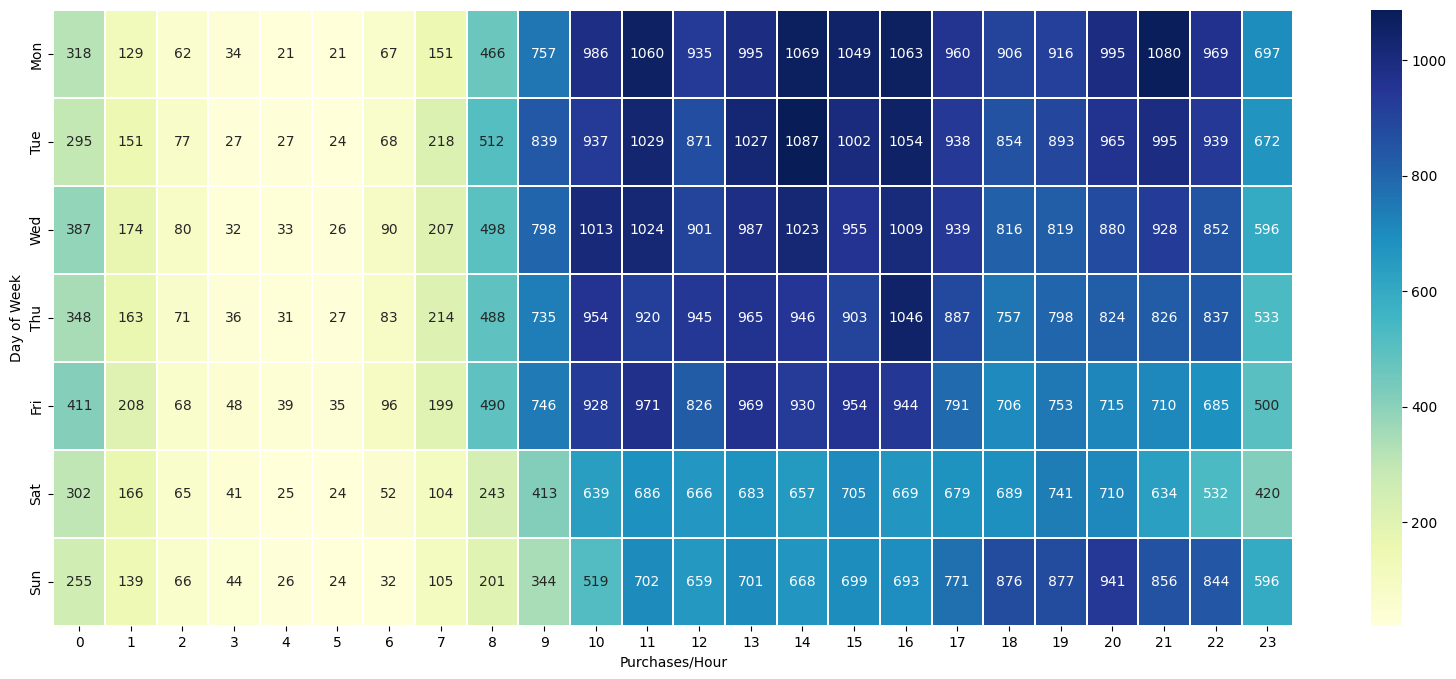

In [ ]:
purchase_count = Olist.groupby(['order_purchase_day', 'order_purchase_hour']).nunique()['order_id'].unstack()
plt.figure(figsize=(20,8))
sns.heatmap(purchase_count.reindex(index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']), cmap="YlGnBu", annot=True, fmt="d", linewidths=0.2)
plt.xlabel('Purchases/Hour')
plt.ylabel('Day of Week')
plt.show()

Bản đồ nhiệt trực quan hóa số lượng đơn đặt hàng được đặt vào mỗi ngày trong tuần và giờ trong ngày. Màu xanh càng đậm thì số lượng đơn hàng càng cao. Dưới đây là một số quan sát chính:

**Xu hướng chung:**

* Peak Hours: Giờ bận rộn nhất cho các đơn đặt hàng dường như là từ **10 giờ sáng đến 2 giờ chiều** liên tục trong suốt cả tuần. Điều này có thể là do mọi người duyệt và mua hàng trong giờ nghỉ trưa hoặc trong giờ nghỉ làm giữa buổi sáng.

* Busiest Days: **Thứ Ba, Thứ Tư và Thứ Năm** dường như có tổng số lượng đơn đặt hàng cao nhất, đặc biệt là trong những giờ cao điểm nêu trên. Thứ Hai và thứ Sáu cũng có lượng đặt hàng đáng kể, mặc dù thấp hơn một chút so với những ngày giữa tuần.

* Slowest Days: **Thứ Bảy và Chủ Nhật** chứng kiến số lượng đơn đặt hàng thấp nhất, cho thấy hoạt động mua sắm trực tuyến có thể sụt giảm trong những ngày cuối tuần.

**Quan sát cụ thể:**

* Early Morning Dip: Số lượng đơn đặt hàng luôn thấp vào những giờ sáng sớm (**12:00 sáng đến 8:00 sáng**) trong tất cả các ngày, có thể là do mọi người đang ngủ.

* Evening Activity: Mặc dù lượng đơn đặt hàng nhìn chung giảm sau giờ cao điểm nhưng hoạt động lại tăng lên đáng chú ý vào các giờ buổi tối (**khoảng 7 giờ tối đến 10 giờ tối**), đặc biệt là vào các ngày trong tuần. Điều này có thể là do mọi người mua hàng sau giờ làm việc.

* Weekend Behavior: Việc phân bổ đơn hàng vào cuối tuần trải đều hơn trong ngày so với ngày thường, không có giờ cao điểm rõ rệt. Điều này gợi ý một mô hình mua sắm khác vào cuối tuần, có thể là duyệt web trong thời gian rảnh rỗi hơn.

### Total Sales month vs DayofWeek

In [ ]:
# creating a purchase day feature
df = Olist.copy()

# creating an aggregation
sales_per_purchase_month = Olist.groupby(['order_purchase_month', 'order_purchase_mon', 'order_purchase_day'], as_index=False).payment_value.sum()
sales_per_purchase_month = sales_per_purchase_month.sort_values(by=['order_purchase_month'], ascending=True)

In [ ]:
df = sales_per_purchase_month
fig = px.line(df, x="order_purchase_mon", y="payment_value", color='order_purchase_day', title='Sales Each Month & Each DayofWeek')

fig.update_layout(
    title="Sales Each Month & Each DayofWeek",
    xaxis_title="Months",
    yaxis_title="Sales(in $$)",
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

Biểu đồ cung cấp những hiểu biết có giá trị về xu hướng bán hàng qua các tháng và ngày khác nhau trong tuần. Cụ thể như sau:

**Xu hướng chung:**

* Doanh số bán hàng biến động: Tổng số liệu bán hàng cho thấy sự biến động đáng kể trong suốt cả năm, cho thấy tính thời vụ tiềm ẩn hoặc các yếu tố ảnh hưởng khác. Các tháng như tháng 9 và tháng 10 cho thấy doanh số bán hàng tương đối thấp hơn, trong khi tháng 11 và tháng 12 chứng kiến mức tăng mạnh, có thể do hoạt động mua sắm trong dịp lễ.

* Sự khác biệt giữa các ngày trong tuần: Có sự khác biệt rõ ràng về doanh số bán hàng giữa các ngày khác nhau trong tuần, với một số ngày luôn hoạt động tốt hơn những ngày khác.

**Quan sát cụ thể:**
* Các ngày trong tuần so với cuối tuần: Các ngày trong tuần thường có doanh số bán hàng cao hơn so với cuối tuần, trong đó Thứ Hai, Thứ Ba và Thứ Tư thường cho thấy hiệu suất cao hơn. Điều này cho thấy phần lớn hoạt động mua hàng diễn ra trong tuần làm việc.

* Xu hướng cuối tuần: Doanh số bán hàng giảm đáng kể vào cuối tuần, đặc biệt là vào Chủ nhật. Thứ Bảy dường như có doanh số bán hàng cao hơn một chút so với chủ nhật nhưng vẫn thấp hơn các ngày trong tuần.

* Biến động hàng tháng:
  * Những tháng đầu: Tháng 1 và tháng 2 cho thấy xu hướng tương đối ổn định qua các ngày khác nhau trong tuần, với tốc độ tăng trưởng dần dần.
  * Mùa xuân: Tháng 3 và tháng 4 chứng kiến doanh số bán hàng giảm trong hầu hết các ngày, giảm rõ rệt hơn vào cuối tuần.
  * Mùa hè: Tháng 5 đến tháng 8 cho thấy xu hướng dao động với một số đỉnh và đáy, trong đó tháng 7 thường có doanh số bán hàng cao hơn.
  * Mùa thu: Tháng 9 và tháng 10 có xu hướng giảm, doanh số bán hàng tăng trở lại vào tháng 11 và tháng 12, có thể là do mùa mua sắm vào dịp lễ.

### Trends for Product Review Scores

In [ ]:
Olist['review_dayofweek'] = Olist.review_answer_timestamp.apply(lambda x: x.dayofweek)
Olist['review_day'] = Olist['review_dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
Olist['review_month'] = Olist.review_answer_timestamp.apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [ ]:
# creating a purchase day feature
df = Olist.copy()


review_score_per_month = Olist.groupby(['review_month', 'review_day'], as_index=False).review_score.mean()
review_score_per_month

,review_month,review_day,review_score
0,Apr,Fri,3.837986
1,Apr,Mon,3.757674
2,Apr,Sat,3.859589
3,Apr,Sun,3.832821
4,Apr,Thu,3.878736
...,...,...,...
79,Sep,Sat,4.280311
80,Sep,Sun,4.134868
81,Sep,Thu,4.216095
82,Sep,Tue,4.145270


In [ ]:
import plotly.express as px

df = review_score_per_month
fig = px.line(df, x="review_month", y="review_score", color='review_day', title='Sales Each Month & Each DayofWeek')

fig.update_layout(
    title="Ratings Each Month & DayofWeek",
    xaxis_title="Months",
    yaxis_title="Review Ratings",
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

**Xu hướng hàng tháng:**
* Tháng 4-Tháng 8: Khoảng thời gian từ tháng 4 đến tháng 8 cho thấy điểm đánh giá tương đối cao hơn với một số đỉnh và thung lũng.

* Tháng 9-Tháng 3: Các tháng từ tháng 9 đến tháng 3 thể hiện xu hướng không nhất quán hơn với điểm đánh giá giảm xuống thấp hơn.

* Điểm thấp trong tháng 3: Tháng 3 cho thấy điểm đánh giá giảm đáng kể trong hầu hết các ngày trong tuần, cho thấy các vấn đề tiềm ẩn trong giai đoạn này cần được điều tra thêm.

In [ ]:
# creating an aggregation
avg_score_per_category = Olist.groupby('product_category_name', as_index=False).agg({'review_score': ['count', 'mean']})
avg_score_per_category.columns = ['Product Category', 'Number of Reviews', 'Average Review Ratings']

# filtering to show only categories with more than 50 reviews
avg_score_per_category = avg_score_per_category[avg_score_per_category['Number of Reviews'] > 100]
avg_score_per_category = avg_score_per_category.sort_values(by='Number of Reviews', ascending=False)
avg_score_per_category

,Product Category,Number of Reviews,Average Review Ratings
7,Bed Bath Table,11847,3.890605
43,Health Beauty,9944,4.137973
65,Sports Leisure,8942,4.107470
39,Furniture Decor,8743,3.912158
15,Computers Accessories,8105,3.936089
49,Housewares,7331,4.060428
70,Watches Gifts,6161,4.017692
68,Telephony,4692,3.948849
42,Garden Tools,4558,4.023914
5,Auto,4356,4.064279


In [ ]:
import plotly.express as px
avg_ratings = avg_score_per_category[:20]
fig = px.bar(avg_ratings, x='Product Category', y='Number of Reviews',
             hover_data=['Average Review Ratings'], color='Average Review Ratings',
             height=500)
fig.show()

**Phân phối tổng thể:**
* Số lượng đánh giá: Biểu đồ được sắp xếp theo thứ tự giảm dần về số lượng đánh giá, trong đó **"Bed Bath & Table"** có số lượng đánh giá cao nhất và **"Consoles Games"** có số lượng đánh giá thấp nhất trong số 20 danh mục hàng đầu. Điều này cho thấy mức độ tương tác và mức độ phổ biến khác nhau của khách hàng đối với các loại sản phẩm khác nhau.


**Quan sát cụ thể:**

* Số lượng đánh giá cao, Xếp hạng trung bình cao: Các danh mục như **"Bed Bath & Table", "Health & Beauty" và "Sports & Leisure"** có số lượng đánh giá cao và xếp hạng trung bình tương đối cao (trên 4,0). Điều này cho thấy một cơ sở khách hàng lớn với những trải nghiệm nhìn chung tích cực.

* Số lượng đánh giá vừa phải, Xếp hạng trung bình vừa phải: Một số danh mục, bao gồm **"Furniture & Decor", "Computers & Accessories", "Watches & Gifts", và "Toys"** nằm trong phạm vi giữa của cả số lượng đánh giá và xếp hạng trung bình.

* Số lượng đánh giá thấp, xếp hạng trung bình đa dạng: Các danh mục như **"Electronics", "Stationery", và "Pet Shop"** có số lượng đánh giá thấp hơn nhưng xếp hạng trung bình của chúng khác nhau, trong đó **"Electronics"** có xếp hạng trung bình cao hơn so với các danh mục khác.

* Số lượng đánh giá thấp nhất, xếp hạng trung bình thấp hơn:  "Console Games" có số lượng đánh giá thấp nhất trong số 20 danh mục hàng đầu và xếp hạng trung bình tương đối thấp hơn.

### Top Categories by Sales Revenue

In [ ]:
sales_per_category = Olist.groupby(['order_purchase_mon', 'product_category_name'], as_index=False).payment_value.sum()
sales_per_category = sales_per_category.sort_values(by=['payment_value'], ascending=False)
sales_per_category.columns = ['Purchase Month','Product Category', 'Sales Revenue']
sales_per_category

,Purchase Month,Product Category,Sales Revenue
213,Feb,Computers Accessories,226973.49
111,Aug,Health Beauty,218698.32
339,Jul,Bed Bath Table,199949.46
576,May,Health Beauty,197464.31
601,May,Watches Gifts,195681.22
...,...,...,...
708,Oct,Home Comfort 2,56.00
693,Oct,Fashion Childrens Clothes,54.09
568,May,Flowers,35.72
3,Apr,Arts And Craftmanship,34.22


In [ ]:
import plotly.express as px

df = sales_per_category
fig = px.bar(df, y='Sales Revenue', x='Product Category', text='Sales Revenue', hover_data=['Purchase Month'])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(barmode='stack',uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

**Phân phối tổng thể:**

* Phạm vi doanh thu rộng: Các danh mục thể hiện nhiều loại doanh thu bán hàng, với một số danh mục tạo ra doanh thu cao hơn đáng kể so với các danh mục khác. Điều này nhấn mạnh sự phổ biến và lợi nhuận khác nhau của các loại sản phẩm khác nhau.

* Danh mục có hiệu suất cao nhất: Các danh mục như **"Computers & Accessories", "Bed Bath & Table", "Furniture & Decor", "Sports & Leisure", và "Garden Tools"** dường như là những danh mục có hiệu suất cao nhất, đóng góp một phần đáng kể vào tổng doanh thu doanh thu.

* Long Tail: Một số lượng lớn các danh mục đóng góp lượng doanh thu nhỏ hơn, tạo thành một đuôi dài trong phân phối.

**Quan sát cụ thể:**

* Technology and Home Goods: Các danh mục liên quan đến công nghệ và hàng gia dụng, chẳng hạn như **"Computers & Accessories", "Bed Bath & Table", và "Furniture & Decor"**, thống trị các vị trí hàng đầu, cho thấy nhu cầu và khả năng sinh lời cao trong các lĩnh vực này.

* Leisure and Outdoor: Các danh mục như **"Sports & Leisure" và "Garden Tools"** cũng hoạt động tốt, cho thấy sự quan tâm đáng kể của khách hàng đối với các hoạt động giải trí và thiết bị ngoài trời.

* Niche Categories: Một số danh mục thích hợp, chẳng hạn như "Agro, Industry & Commerce", "Musical Instruments", và "Security", đóng góp lượng doanh thu nhỏ hơn nhưng vẫn đóng một vai trò trong danh mục sản phẩm tổng thể.

### Metrics for Digital Marketing Dashboard

## Brand/Category Performance across Years

### Horizontal Metrics for dashboard (YTD for 2018)

In [ ]:
total_rev_year = Olist.groupby(['order_purchase_year'], as_index=False).payment_value.sum()
#total_rev_year = total_rev_year[total_rev_year['order_purchase_year']== 2018]
total_rev_year

,order_purchase_year,payment_value
0,2016,73142.96
1,2017,8947145.91
2,2018,10909243.63


In [ ]:
total_orders = Olist.groupby(['order_purchase_year'], as_index=False).order_id.nunique()
total_orders

,order_purchase_year,order_id
0,2016,304
1,2017,43420
2,2018,52792


In [ ]:
total_category = Olist.product_category_name.nunique()
total_category

71

In [ ]:
total_customers = Olist.customer_unique_id.nunique()
total_customers

93396

**Số lượng khách hàng là: 93396 khách**

### Vertical Metrics for Dashboard

### 1. Total Sales by category

In [ ]:
import plotly.graph_objects as go

df = Olist[Olist.order_purchase_year == 2018]
sales_per_category = df.groupby(['product_category_name'], as_index=False).payment_value.sum()
sales_per_category = sales_per_category.sort_values(by=['payment_value'], ascending=False)
sales_per_category.columns = ['Product Category', 'Sales Revenue']

sales_per_category = sales_per_category[:20]
labels = sales_per_category['Product Category']
values = sales_per_category['Sales Revenue']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

**Phân phối tổng thể:**

* Danh mục chiếm ưu thế: **"Health & Beauty", "Bed Bath & Table", và "Computers & Accessories"** chiếm phần lớn nhất của biểu đồ và đóng góp đáng kể vào tổng doanh thu.

* Đóng góp tầm trung: Một số danh mục, bao gồm **"Sports & Leisure", "Watches & Gifts", "Furniture & Decor", "Housewares", và "Auto"**, chiếm tỷ trọng vừa phải trong tổng doanh số bán hàng, đóng vai trò đáng kể trong danh mục sản phẩm tổng thể.

* Phân khúc nhỏ hơn: Các danh mục như **"Garden Tools", "Office Furniture", "Cool Stuff", "Telephony"** và các danh mục khác tạo thành các phân khúc nhỏ hơn, cho thấy mức đóng góp vào doanh thu thấp hơn.

**Quan sát cụ thể:**

* Tập trung vào Sức khỏe và Gia đình: Sự nổi bật của **"Health & Beauty" and "Bed Bath & Table"** cho thấy sự tập trung mạnh mẽ của khách hàng vào các sản phẩm chăm sóc cá nhân và đồ gia dụng.

* Công nghệ và Phụ kiện: Đóng góp đáng kể của **"Computers & Accessories"** làm nổi bật nhu cầu về các sản phẩm và phụ kiện liên quan đến công nghệ.

* Danh mục đầu tư đa dạng: Sự hiện diện của nhiều danh mục, từ **"Sports & Leisure" đến "Pet Shop"**, thể hiện danh mục sản phẩm đa dạng đáp ứng nhiều nhu cầu và sở thích khác nhau của khách hàng.

In [ ]:
total_rev_month = Olist.groupby(['order_purchase_year', 'order_purchase_mon', 'product_category_name'], as_index=False).payment_value.sum()
#total_rev_month = total_rev_month.sort_values(by=['order_purchase_year'], ascending=True)
total_rev_month.columns = ['Sales Year','Sales Month','Product Category' , 'Sales Revenue']
total_rev_month

,Sales Year,Sales Month,Product Category,Sales Revenue
0,2016,Dec,Fashion Bags Accessories,19.62
1,2016,Oct,Air Conditioning,4675.43
2,2016,Oct,Audio,183.03
3,2016,Oct,Auto,2716.70
4,2016,Oct,Baby,2344.43
...,...,...,...,...
1245,2018,May,Tablets Printing Image,58.19
1246,2018,May,Telephony,27052.23
1247,2018,May,Toys,38166.71
1248,2018,May,Watches Gifts,150548.16


### 2. Category Sales across years

In [ ]:
import plotly.express as px
import numpy as np
df = total_rev_month
fig = px.sunburst(df, path=['Sales Year', 'Product Category'], values='Sales Revenue',
                  color='Sales Revenue', hover_data=['Sales Revenue'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['Sales Revenue'], weights=df['Sales Revenue']))
fig.show()

In [ ]:
# Calculate total sales revenue per category per year
df_grouped = df.groupby(['Sales Year', 'Product Category'])['Sales Revenue'].sum().sort_values(ascending=False).reset_index()

# Create the column chart
fig = px.bar(df_grouped,
             x='Product Category',
             y='Sales Revenue',
             color='Sales Year',
             barmode='group',  # Use 'group' for grouped columns, 'stack' for stacked columns
             labels={'Sales Revenue': 'Total Sales Revenue'},
             title='Category Sales Across Years')

fig.show()

In [ ]:
top_products = total_rev_month.groupby('Product Category')['Sales Revenue'].sum().sort_values(ascending=False).head(10).index

# Lọc dữ liệu cho 10 sản phẩm hàng đầu
top_data = total_rev_month[total_rev_month['Product Category'].isin(top_products)]

top_data = top_data.sort_values(by=['Sales Year', 'Product Category'])

# Vẽ biểu đồ cột ghép
plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")

# Sử dụng seaborn để vẽ biểu đồ cột
ax = sns.barplot(x="Product Category", y="Sales Revenue", hue="Sales Year", data=top_data)

# Đặt tiêu đề và nhãn cho biểu đồ
ax.set_title('Top 10 sản phẩm có tổng doanh thu cao nhất trong 3 năm', fontsize=16)
ax.set_xlabel('Loại sản phẩm', fontsize=14)
ax.set_ylabel('Doanh thu', fontsize=14)

# Hiển thị giá trị trên cột
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.xticks(rotation=45)  # Xoay nhãn trên trục x để dễ đọc
plt.tight_layout()
plt.show()


**Quan sát tổng thể:**

* Danh mục chiếm ưu thế:  **"Bed Bath & Table" và "Health & Beauty"** liên tục chiếm ưu thế doanh số bán hàng trong cả năm 2017 và 2018, chiếm phân khúc lớn nhất trong cả hai năm.

* Tăng trưởng và Suy thoái: Trong khi một số danh mục duy trì hiệu suất tương đối ổn định trong hai năm, những danh mục khác lại có sự tăng trưởng hoặc suy giảm đáng chú ý. Ví dụ: **"Computers & Accessories" và "Furniture & Decor"** dường như đã tăng thị phần trong năm 2018 so với năm 2017.

**Quan sát cụ thể:**

* Thành tích năm 2017: **"Bed Bath & Table"** chiếm thị phần lớn nhất trong năm 2017, tiếp theo là **"Health & Beauty", "Computers & Accessories", và "Furniture & Decor"**. Các danh mục như **"Sports & Leisure", "Watches & Gifts", và "Housewares"** cũng đóng góp đáng kể.

* Xu hướng năm 2018: “Bed Bath & Table” duy trì vị trí dẫn đầu trong năm 2018, trong khi **"Health & Beauty"** tăng trưởng nhẹ. **"Computers & Accessories", và "Furniture & Decor"** có thị phần tăng rõ rệt hơn, cho thấy tiềm năng tăng trưởng về nhu cầu đối với các danh mục này.

### 3. Sales by Hour

In [ ]:
total_rev_hour = Olist[Olist['order_purchase_year'] == 2018].groupby(['order_purchase_hour', 'product_category_name'], as_index=False).payment_value.sum()
#total_rev_month = total_rev_month.sort_values(by=['order_purchase_year'], ascending=True)
total_rev_hour.columns = ['Sales Hour','Product Category' , 'Sales Revenue']
total_rev_hour


,Sales Hour,Product Category,Sales Revenue
0,0,Agro Industry And Commerce,610.22
1,0,Air Conditioning,1801.40
2,0,Art,1206.29
3,0,Audio,587.91
4,0,Auto,7175.56
...,...,...,...
1316,23,Stationery,6965.88
1317,23,Tablets Printing Image,129.32
1318,23,Telephony,9694.45
1319,23,Toys,6758.91


In [ ]:
labels = total_rev_hour['Sales Hour']
values = total_rev_hour['Sales Revenue']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

**Phân phối tổng thể:**

* Doanh thu bán hàng dường như được phân bổ tương đối đồng đều trong nhiều giờ khác nhau, không có giờ nào chiếm phần lớn doanh thu.

* Điều này cho thấy nhu cầu nhất quán suốt cả ngày, có thể là do các yếu tố như cơ sở khách hàng đa dạng với sở thích mua sắm khác nhau hoặc mô hình kinh doanh đáp ứng các nhu cầu khác nhau trong ngày (ví dụ: bữa sáng, bữa trưa, bữa tối).

**Giờ cao điểm:**

* Mặc dù không có giờ thống trị duy nhất nhưng một số giờ dường như có đóng góp doanh thu cao hơn một chút:
  *  Chiều đến tối: Các giờ như 15, 16 và 14 dường như chiếm tỷ lệ lớn hơn một chút, có khả năng cho thấy hoạt động của khách hàng đạt đỉnh điểm vào cuối giờ chiều và đầu giờ tối.
  * Giờ ban đêm: Những giờ như 22 và 23 cũng có tỷ lệ phần trăm cao hơn một chút, điều này có thể gợi ý một phân khúc khách hàng thích mua sắm vào đêm khuya.

### 4. Category Sales by Hour

In [ ]:
df = total_rev_hour
fig = px.sunburst(df, path=['Sales Hour', 'Product Category'], values='Sales Revenue',
                  color='Sales Revenue', hover_data=['Product Category'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['Sales Revenue'], weights=df['Sales Revenue']))
fig.show()

In [ ]:
# Calculate total sales revenue per category per hour
df_grouped = df.groupby(['Sales Hour', 'Product Category'])['Sales Revenue'].sum().sort_values(ascending=False).reset_index()

# Create the column chart
fig = px.bar(df_grouped,
             x='Product Category',
             y='Sales Revenue',
             color='Sales Hour',
             barmode='group',  # Use 'group' for grouped columns, 'stack' for stacked columns
             labels={'Sales Revenue': 'Total Sales Revenue'},
             title='Category Sales by Hour')

fig.show()

### 5. Category Sales by Day of Week

In [ ]:
total_rev_hour = Olist[Olist['order_purchase_year'] == 2018].groupby(['order_purchase_day', 'product_category_name'], as_index=False).payment_value.sum()
#total_rev_month = total_rev_month.sort_values(by=['order_purchase_year'], ascending=True)
total_rev_hour.columns = ['Sales DayofWeek','Product Category' , 'Sales Revenue']
total_rev_hour


,Sales DayofWeek,Product Category,Sales Revenue
0,Fri,Agro Industry And Commerce,5839.40
1,Fri,Air Conditioning,5826.38
2,Fri,Art,2398.56
3,Fri,Arts And Craftmanship,408.95
4,Fri,Audio,4834.79
...,...,...,...
458,Wed,Stationery,33258.31
459,Wed,Tablets Printing Image,263.43
460,Wed,Telephony,60762.40
461,Wed,Toys,34574.24


In [ ]:
labels = total_rev_hour['Sales DayofWeek']
values = total_rev_hour['Sales Revenue']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [ ]:
df = total_rev_hour
fig = px.sunburst(df, path=['Sales DayofWeek', 'Product Category'], values='Sales Revenue',
                  color='Sales Revenue', hover_data=['Product Category'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['Sales Revenue'], weights=df['Sales Revenue']))
fig.show()

In [ ]:
# Calculate total sales revenue per category per day of the week
df_grouped = df.groupby(['Sales DayofWeek', 'Product Category'])['Sales Revenue'].sum().sort_values(ascending=False).reset_index()

# Create the column chart
fig = px.bar(df_grouped,
             x='Product Category',
             y='Sales Revenue',
             color='Sales DayofWeek',
             barmode='group',  # Use 'group' for grouped columns, 'stack' for stacked columns
             labels={'Sales Revenue': 'Total Sales Revenue'},
             title='Category Sales by Day of Week')

fig.show()

### 6. Category Activity wrt purchases

In [ ]:
cat_activity = Olist[Olist['order_purchase_year'] == 2018].groupby(['product_category_name']).order_id.nunique()
#cat_activity = cat_activity.sort_values(['Activity'], ascending=True)
cat_activity = pd.DataFrame(cat_activity)
cat_activity.columns = [ 'Activity']
cat_activity = cat_activity.sort_values(by=['Activity'], ascending=False)
cat_activity

,Activity
product_category_name,
Health Beauty,5366
Bed Bath Table,4859
Sports Leisure,4035
Computers Accessories,4029
Watches Gifts,3463
...,...
Home Comfort 2,7
Fashion Sport,5
La Cuisine,3


In [ ]:
fig = px.funnel_area(names=cat_activity.index,
                    values=cat_activity.Activity)
fig.show()